### Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [5]:
df.select_dtypes(exclude='object').columns

Index(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek',
       'day', 'hour', 'y'],
      dtype='object')

In [6]:
# Converting Banner Position to object
df.banner_pos = df.banner_pos.astype("str")
df[['C1', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']] = df[['C1', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']].astype("str")

In [7]:
df.describe()

,device_type,device_conn_type,month,dayofweek,day,hour,y
count,99999.00000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.01639,0.329453,10.0,2.592836,25.485755,11.300673,0.169802
std,0.53110,0.854673,0.0,1.723003,2.968520,5.938725,0.375460
min,0.00000,0.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1.00000,0.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1.00000,0.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1.00000,0.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,5.00000,5.000000,10.0,6.000000,30.000000,23.000000,1.000000


- The data is of 1 week (21-30 of October)

In [8]:
df.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [9]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

Target -> 'click'
 
site features -> 'site_id', 'site_domain', 'site_category',

app features -> 'app_id', 'app_domain', 'app_category', 

device features -> 'device_id', 'device_ip','device_model', 'device_type', 'device_conn_type', 

anonymized categorical features -> 'C1', 'C14', 'C15', 'C16','C17', 'C18', 'C19', 'C20', 'C21', 

other features -> 'month', 'dayofweek', 'day', 'hour','banner_pos',

#### Checking for variance across CTR and other variables

<AxesSubplot:xlabel='click', ylabel='C1'>

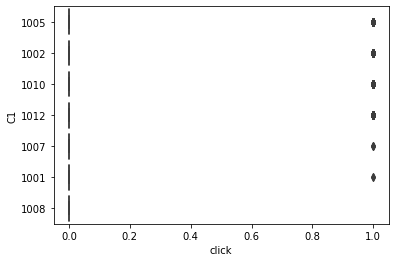

In [10]:
sns.boxplot(data= df,x='click',y='C1')

In [11]:
'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'

('C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21')

<AxesSubplot:xlabel='click', ylabel='banner_pos'>

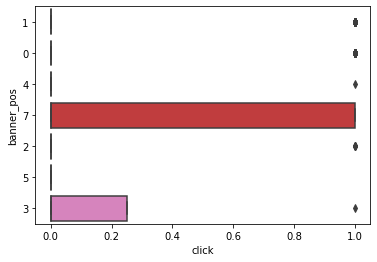

In [12]:
sns.boxplot(data= df,x='click',y='banner_pos')

<AxesSubplot:xlabel='y', ylabel='device_conn_type'>

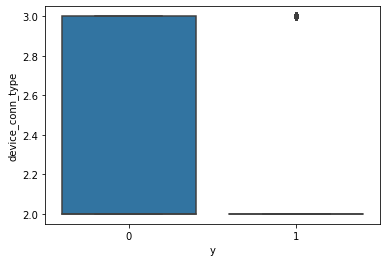

In [13]:
sns.boxplot(data= df[(df['device_conn_type']>0) &(df['device_conn_type']<5)],x='y',y='device_conn_type')

<AxesSubplot:xlabel='y', ylabel='count'>

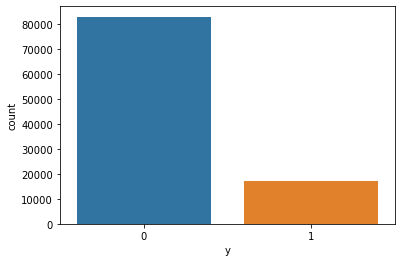

In [14]:
# Check the CTR for Complete Dataset
sns.countplot(data=df, x='y')

In [15]:
df.y.value_counts(normalize=True)
# CTR = 16.9%

0    0.830198
1    0.169802
Name: y, dtype: float64

Dates wise analysis

In [16]:
df.day.value_counts()

22    13092
28    13056
30    10495
21    10213
29     9742
23     9519
26     9326
24     8264
25     8258
27     8034
Name: day, dtype: int64

In [17]:
CTR_day_wise = df.pivot_table(index='day',values='y',aggfunc='mean')*100

<AxesSubplot:xlabel='day'>

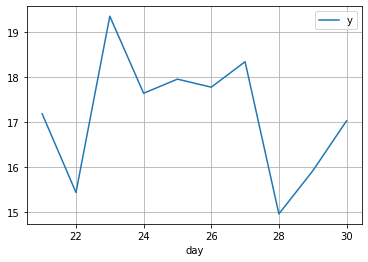

In [18]:
CTR_day_wise.plot(grid= True)

In [19]:
CTR_hour_wise = df.pivot_table(index='hour',values='y',aggfunc='mean')*100

<AxesSubplot:xlabel='hour'>

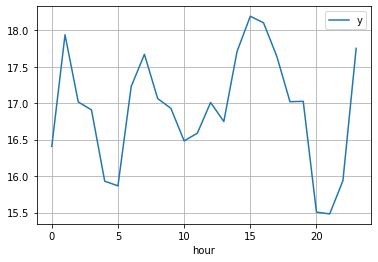

In [20]:
CTR_hour_wise.plot(grid= True)

In [21]:
CTR_day_of_week = df.pivot_table(index='dayofweek',values='y',aggfunc='mean')*100

<AxesSubplot:xlabel='dayofweek'>

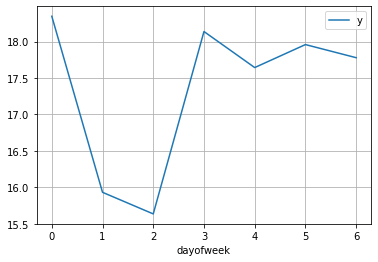

In [22]:
CTR_day_of_week.plot(grid= True)

Banner Position

In [23]:
CTR_bannerpos = df.pivot_table(index='banner_pos',values='y',aggfunc='mean')*100

<AxesSubplot:xlabel='banner_pos'>

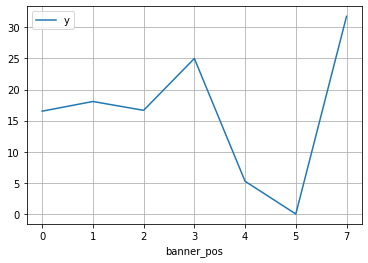

In [24]:
CTR_bannerpos.plot(grid= True)
# Variation of CTR is visible on Banner Position

Device Type

In [25]:
CTR_device = df.pivot_table(index='device_type',values='y',aggfunc='mean')*100

<AxesSubplot:xlabel='device_type'>

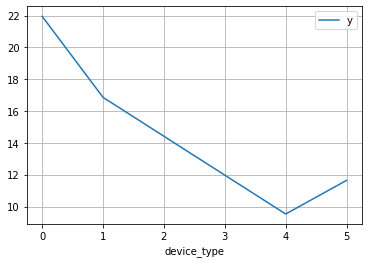

In [26]:
CTR_device.plot(grid= True)
# Variation of CTR is visible on Device Type

<AxesSubplot:xlabel='device_conn_type'>

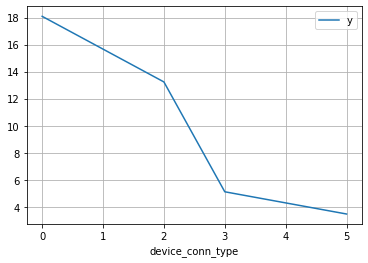

In [27]:
CTR_device_conn_type = df.pivot_table(index='device_conn_type',values='y',aggfunc='mean')*100
CTR_device_conn_type.plot(grid= True)

Site Category

<AxesSubplot:xlabel='site_category'>

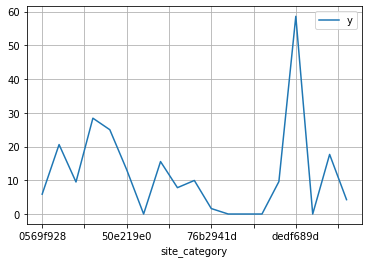

In [28]:
CTR_site_category = df.pivot_table(index='site_category',values='y',aggfunc='mean')*100
CTR_site_category.plot(grid= True)

App Category

<AxesSubplot:xlabel='app_category'>

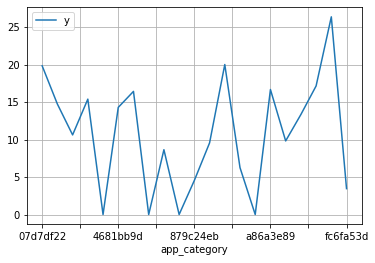

In [29]:
CTR_app_category = df.pivot_table(index='app_category',values='y',aggfunc='mean')*100
CTR_app_category.plot(grid= True)

Anonymized variable C1

<AxesSubplot:xlabel='C1'>

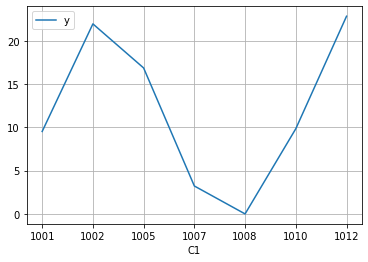

In [30]:
CTR_C1 = df.pivot_table(index='C1',values='y',aggfunc='mean')*100
CTR_C1.plot(grid= True)


### Data Cleaning and Set Up

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  object
 2   banner_pos        99999 non-null  object
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  object
 15  C15               99999 non-null  object
 16  C16               99999 non-null  object
 17  C17         

In [32]:
df.nunique()
# Removing  site_domain,app_id,device_id,device_ip, device_model, month from consideration 
#(as one hot encoding will make too many variables and many of these are redundant)

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [33]:
df2 = df.drop(['device_ip','click','site_domain','app_id','device_id','month','device_model','site_id','app_domain'],axis = 1)

In [34]:
categorical = list(df2.select_dtypes(include='object').columns)

In [35]:
categorical

['C1',
 'banner_pos',
 'site_category',
 'app_category',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [36]:
df3 = pd.get_dummies(df2, columns= categorical, drop_first = True )

In [37]:
df3.shape

(99999, 2468)

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 2468 entries, device_type to C21_95
dtypes: int64(6), uint8(2462)
memory usage: 239.4 MB


In [39]:
X = df3.drop('y',axis=1)

In [40]:
y=df3['y']

In [41]:
X.shape

(99999, 2467)

# Performing Logistic Regression 

## Reasons for taking logistic regression: 
1. It is  the simplest known model for classification, so if we see that the performance is good we can shift to higher complexity models.
2. Easy to interpret the results and explain to Stakeholders.


## Model 1 : Taking All Possible Variables

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.coef_

array([[-0.14940388, -0.06355358, -0.01006372, ..., -0.01936644,
         0.07677394, -0.05382179]])

In [46]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8313666666666667


In [47]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[24739   141]
 [ 4918   202]]


In [48]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

[[24880     0]
 [ 5120     0]]


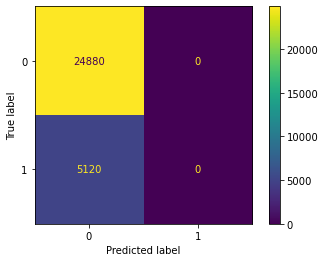

In [49]:
y_pred_dummy = dummy_clf.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dummy)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_clf, X_test, y_test)
plt.show()

In [50]:
print(metrics.accuracy_score(y_test, y_pred_dummy))

0.8293333333333334


In [51]:
# Model is Performing better than Dummy Classifier

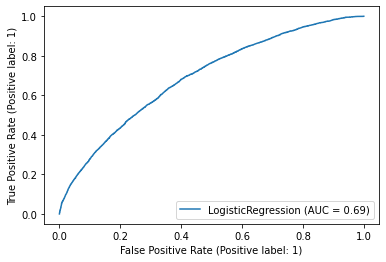

In [52]:
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()
# 69% is the AUC 

## Model 2 : Removing variable C14-C21

In [53]:
col_list = list(X.columns)

In [54]:
col_to_remove= []
for col in col_list:
    if 'C14' in col or 'C15'in col or 'C16'in col or 'C17'in col or  'C18'in col or 'C19'in col or 'C20'in col or 'C21' in col  :
        col_to_remove.append(col)

In [55]:
col_to_remove

['C14_1037',
 'C14_1038',
 'C14_1039',
 'C14_10532',
 'C14_10536',
 'C14_10738',
 'C14_10739',
 'C14_10740',
 'C14_10741',
 'C14_10742',
 'C14_10743',
 'C14_10897',
 'C14_11142',
 'C14_11144',
 'C14_11188',
 'C14_11190',
 'C14_11193',
 'C14_11323',
 'C14_11325',
 'C14_12000',
 'C14_12012',
 'C14_12026',
 'C14_12034',
 'C14_12043',
 'C14_12199',
 'C14_12217',
 'C14_12469',
 'C14_12470',
 'C14_12471',
 'C14_12472',
 'C14_12477',
 'C14_1266',
 'C14_1267',
 'C14_1268',
 'C14_1272',
 'C14_1275',
 'C14_1276',
 'C14_1278',
 'C14_13557',
 'C14_13558',
 'C14_13560',
 'C14_13643',
 'C14_13644',
 'C14_13777',
 'C14_13778',
 'C14_13779',
 'C14_13780',
 'C14_13781',
 'C14_13782',
 'C14_13783',
 'C14_14140',
 'C14_14142',
 'C14_14202',
 'C14_14264',
 'C14_14265',
 'C14_14266',
 'C14_14283',
 'C14_14983',
 'C14_14985',
 'C14_14988',
 'C14_15005',
 'C14_15006',
 'C14_15010',
 'C14_15016',
 'C14_15017',
 'C14_15385',
 'C14_15387',
 'C14_15388',
 'C14_15390',
 'C14_15503',
 'C14_15504',
 'C14_15505',
 '

In [56]:
X_2 = X.drop(col_to_remove,axis=1)

In [57]:
X_2

,device_type,device_conn_type,dayofweek,day,hour,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,...,app_category_8ded1f7a,app_category_8df2e842,app_category_a3c42688,app_category_a7fd01ec,app_category_a86a3e89,app_category_cef3e649,app_category_d1327cf5,app_category_dc97ec06,app_category_f95efa07,app_category_fc6fa53d
0,1,0,1,28,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,22,19,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3,23,18,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,22,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,21,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,0,3,23,15,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99995,1,0,2,29,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,1,0,2,22,15,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99997,1,0,5,25,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.3, random_state=0)

In [59]:
model_2 = LogisticRegression()

model_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [60]:
y_pred_2 = model_2.predict(X_test_2)
print(metrics.accuracy_score(y_test_2,y_pred_2))
# Accuracy of 82.93

0.8293333333333334


In [61]:
cnf_matrix = metrics.confusion_matrix(y_test_2,y_pred_2)
print(cnf_matrix)
# Outputs are coming same as Base Classifier Model 

[[24880     0]
 [ 5120     0]]


In [62]:
X_2.columns

Index(['device_type', 'device_conn_type', 'dayofweek', 'day', 'hour',
       'C1_1002', 'C1_1005', 'C1_1007', 'C1_1008', 'C1_1010', 'C1_1012',
       'banner_pos_1', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4',
       'banner_pos_5', 'banner_pos_7', 'site_category_28905ebd',
       'site_category_335d28a8', 'site_category_3e814130',
       'site_category_42a36e14', 'site_category_50e219e0',
       'site_category_5378d028', 'site_category_70fb0e29',
       'site_category_72722551', 'site_category_75fa27f6',
       'site_category_76b2941d', 'site_category_8fd0aea4',
       'site_category_9ccfa2ea', 'site_category_a818d37a',
       'site_category_c0dd3be3', 'site_category_dedf689d',
       'site_category_e787de0e', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_09481d60',
       'app_category_0f2161f8', 'app_category_0f9a328c',
       'app_category_2281a340', 'app_category_4681bb9d',
       'app_category_4ce2e9fc', 'app_category_7113d72a',
       'app_category

## Model 3 :  Dropping Site Category and App Category Variables

In [63]:
X.columns

Index(['device_type', 'device_conn_type', 'dayofweek', 'day', 'hour',
       'C1_1002', 'C1_1005', 'C1_1007', 'C1_1008', 'C1_1010',
       ...
       'C21_71', 'C21_76', 'C21_79', 'C21_82', 'C21_85', 'C21_90', 'C21_91',
       'C21_93', 'C21_94', 'C21_95'],
      dtype='object', length=2467)

In [64]:

X_3 = X.drop([ 'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_42a36e14',
       'site_category_50e219e0', 'site_category_5378d028',
       'site_category_70fb0e29', 'site_category_72722551',
       'site_category_75fa27f6', 'site_category_76b2941d',
       'site_category_8fd0aea4', 'site_category_9ccfa2ea',
       'site_category_a818d37a', 'site_category_c0dd3be3',
       'site_category_dedf689d', 'site_category_e787de0e',
       'site_category_f028772b', 'site_category_f66779e6',
       'app_category_09481d60', 'app_category_0f2161f8',
       'app_category_0f9a328c', 'app_category_2281a340',
       'app_category_4681bb9d', 'app_category_4ce2e9fc',
       'app_category_7113d72a', 'app_category_75d80bbe',
       'app_category_79f0b860', 'app_category_879c24eb',
       'app_category_8ded1f7a', 'app_category_8df2e842',
       'app_category_a3c42688', 'app_category_a7fd01ec',
       'app_category_a86a3e89', 'app_category_cef3e649',
       'app_category_d1327cf5', 'app_category_dc97ec06',
       'app_category_f95efa07', 'app_category_fc6fa53d'], axis=1)

In [65]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.3, random_state=0)
model_3 = LogisticRegression()

model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)
print(metrics.accuracy_score(y_test_3,y_pred_3))
# Accuracy of 83.12 

0.8312666666666667


In [66]:
X_train_3.shape

(69999, 2429)

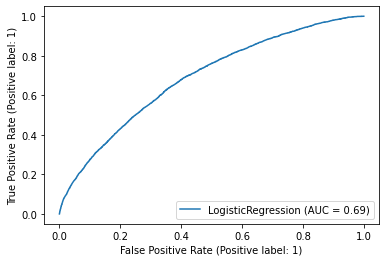

In [67]:
metrics.plot_roc_curve(model_3 , X_test_3, y_test_3) 
plt.show()
# 69% is the AUC 

# Performing Decision Tree Classification
## Reasons for choosing D -tree model 
It can help in improving the accuracy along with ensuring that explanation of outputs to stakeholders is easy.

## Model 4 : Simple D- tree Model

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [69]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [70]:
dt_basic = DecisionTreeClassifier(max_depth=4)
dt_basic.fit(X_train,y_train)
y_preds=dt_basic.predict(X_test)
metrics.accuracy_score(y_test,y_preds)

0.8314333333333334

In [71]:
confusion_matrix(y_test,y_preds)

array([[24800,    80],
       [ 4977,   143]], dtype=int64)

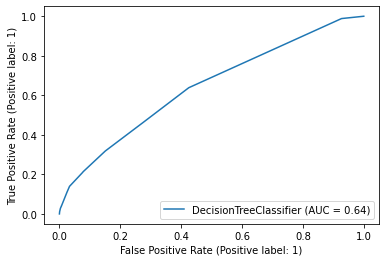

In [72]:
metrics.plot_roc_curve(dt_basic, X_test, y_test) 
plt.show()
# 64% is the AUC 

In [73]:
from sklearn import tree


In [74]:
list(X.columns)

['device_type',
 'device_conn_type',
 'dayofweek',
 'day',
 'hour',
 'C1_1002',
 'C1_1005',
 'C1_1007',
 'C1_1008',
 'C1_1010',
 'C1_1012',
 'banner_pos_1',
 'banner_pos_2',
 'banner_pos_3',
 'banner_pos_4',
 'banner_pos_5',
 'banner_pos_7',
 'site_category_28905ebd',
 'site_category_335d28a8',
 'site_category_3e814130',
 'site_category_42a36e14',
 'site_category_50e219e0',
 'site_category_5378d028',
 'site_category_70fb0e29',
 'site_category_72722551',
 'site_category_75fa27f6',
 'site_category_76b2941d',
 'site_category_8fd0aea4',
 'site_category_9ccfa2ea',
 'site_category_a818d37a',
 'site_category_c0dd3be3',
 'site_category_dedf689d',
 'site_category_e787de0e',
 'site_category_f028772b',
 'site_category_f66779e6',
 'app_category_09481d60',
 'app_category_0f2161f8',
 'app_category_0f9a328c',
 'app_category_2281a340',
 'app_category_4681bb9d',
 'app_category_4ce2e9fc',
 'app_category_7113d72a',
 'app_category_75d80bbe',
 'app_category_79f0b860',
 'app_category_879c24eb',
 'app_catego

[Text(0.5, 0.9, 'C18_2 <= 0.5\ngini = 0.281\nsamples = 69999\nvalue = [58139, 11860]\nclass = Not Click'),
 Text(0.25, 0.7, 'C18_1 <= 0.5\ngini = 0.244\nsamples = 57650\nvalue = [49461, 8189]\nclass = Not Click'),
 Text(0.125, 0.5, 'C19_39 <= 0.5\ngini = 0.257\nsamples = 52936\nvalue = [44923, 8013]\nclass = Not Click'),
 Text(0.0625, 0.3, 'site_category_28905ebd <= 0.5\ngini = 0.242\nsamples = 43528\nvalue = [37385, 6143]\nclass = Not Click'),
 Text(0.03125, 0.1, 'gini = 0.221\nsamples = 33019\nvalue = [28831, 4188]\nclass = Not Click'),
 Text(0.09375, 0.1, 'gini = 0.303\nsamples = 10509\nvalue = [8554, 1955]\nclass = Not Click'),
 Text(0.1875, 0.3, 'C16_250 <= 0.5\ngini = 0.319\nsamples = 9408\nvalue = [7538, 1870]\nclass = Not Click'),
 Text(0.15625, 0.1, 'gini = 0.306\nsamples = 9086\nvalue = [7373, 1713]\nclass = Not Click'),
 Text(0.21875, 0.1, 'gini = 0.5\nsamples = 322\nvalue = [165, 157]\nclass = Not Click'),
 Text(0.375, 0.5, 'C21_51 <= 0.5\ngini = 0.072\nsamples = 4714\nvalu

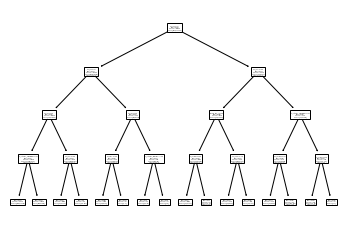

In [75]:
tree.plot_tree(dt_basic,feature_names = list(X.columns), class_names= ['Not Click','Click'])

In [76]:
# Changing the Max Depth and Checking
l=[]
m=[]
for i in range(1,100):
    dt_basic = DecisionTreeClassifier(max_depth=i)
    dt_basic.fit(X_train.drop(col_to_remove,axis=1),y_train) # using reduced features to ensure optimal memory usafe
    y_preds=dt_basic.predict(X_test.drop(col_to_remove,axis=1))
    l.append(i) 
    m.append(metrics.accuracy_score(y_test,y_preds))

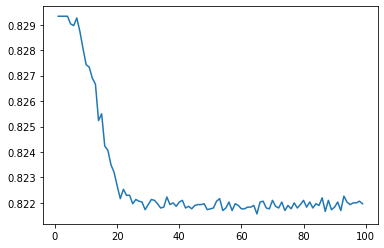

In [77]:
plt.plot(l,m)

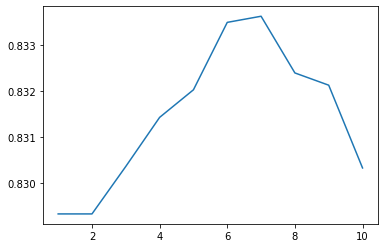

In [78]:
# Checking the same without dropping features for 10 points
l=[]
m=[]
for i in range(1,11):
    dt_basic = DecisionTreeClassifier(max_depth=i)
    dt_basic.fit(X_train,y_train)
    y_preds=dt_basic.predict(X_test)
    l.append(i) 
    m.append(metrics.accuracy_score(y_test,y_preds))
plt.plot(l,m)    
# Higher accuracy comes at 7 depth

## Model 5 : HyperParameter Tuning of Dtree

## Reasons fo choosing this Model 
It ensures that overfitting issue of D-tree is reduced and good outputs are also produced

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [80]:
parameters = {'min_samples_leaf': range(1,300,10),'max_depth': range(1,11), 'criterion':['entropy','gini']}

In [81]:
dtree = DecisionTreeClassifier()

In [82]:
n_folds = 5

In [83]:
grid= GridSearchCV(dtree, parameters, cv= n_folds,  n_jobs = -1, return_train_score=True)

In [84]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 300, 10)},
             return_train_score=True)

In [85]:
X_train.drop(col_to_remove,axis=1).shape

(69999, 55)

In [86]:
grid.fit(X_train.drop(col_to_remove,axis=1),y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 300, 10)},
             return_train_score=True)

In [87]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
420,0.567757,0.018651,0.029636,0.003891,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.830786,0.830643,...,0.830669,0.000101,1,0.830747,0.830676,0.830729,0.830801,0.830750,0.830740,0.000040
150,0.586109,0.018754,0.026830,0.002309,entropy,6,1,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.830857,0.830571,...,0.830655,0.000141,2,0.830729,0.830801,0.830765,0.830818,0.830857,0.830794,0.000044
450,0.617942,0.018056,0.035593,0.007677,gini,6,1,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.830786,0.830571,...,0.830626,0.000127,3,0.830854,0.830854,0.830783,0.830908,0.830857,0.830851,0.000040
483,0.883551,0.100994,0.047775,0.009761,gini,7,31,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.830714,0.830643,...,0.830583,0.000099,4,0.830676,0.830693,0.830568,0.830568,0.830750,0.830651,0.000072
0,0.256443,0.007233,0.026454,0.007794,entropy,1,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.830571,0.830571,...,0.830569,0.000005,5,0.830568,0.830568,0.830568,0.830568,0.830571,0.830569,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,0.710577,0.010734,0.034568,0.011405,gini,9,11,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.829857,0.830571,...,0.829783,0.000959,596,0.831372,0.830801,0.831033,0.831033,0.831161,0.831080,0.000187
240,0.782173,0.072272,0.032574,0.005605,entropy,9,1,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.829286,0.830000,...,0.829612,0.000551,597,0.832301,0.831533,0.831497,0.831872,0.832089,0.831858,0.000312
540,0.694673,0.027575,0.031168,0.004944,gini,9,1,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.829214,0.830071,...,0.829455,0.001071,598,0.832318,0.831943,0.831836,0.831908,0.832411,0.832083,0.000234
270,0.797006,0.030095,0.035818,0.004602,entropy,10,1,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.828357,0.830500,...,0.829426,0.001132,599,0.832836,0.832229,0.832104,0.832318,0.832786,0.832455,0.000299


In [88]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [89]:
best_grid = grid.best_estimator_

In [90]:
best_grid.fit(X_train.drop(col_to_remove,axis=1),y_train)

DecisionTreeClassifier(max_depth=5)

In [91]:
y_pred = best_grid.predict(X_test.drop(col_to_remove,axis=1))

In [92]:
best_grid.score(X_test.drop(col_to_remove,axis=1), y_test)

0.8290333333333333

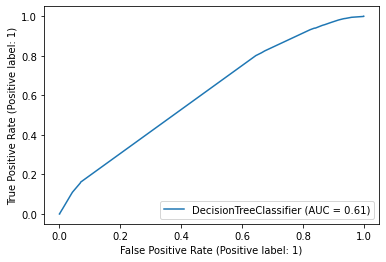

In [93]:
metrics.plot_roc_curve(best_grid, X_test.drop(col_to_remove,axis=1), y_test) 
plt.show()
# 61% is the AUC but the number of features used here are very less compared to the complete set. So a tradeoff is present 
# between accuracy and complexity of a model

In [94]:
pd.DataFrame({'feature':list(X_train.drop(col_to_remove,axis=1).columns),'importance'  : list(best_grid.feature_importances_)}).sort_values(by='importance',ascending=False)

,feature,importance
36,app_category_0f2161f8,0.313694
19,site_category_3e814130,0.184254
11,banner_pos_1,0.156092
45,app_category_8ded1f7a,0.074326
50,app_category_cef3e649,0.070029
1,device_conn_type,0.069925
53,app_category_f95efa07,0.038555
3,day,0.028612
4,hour,0.026248
0,device_type,0.015635


In [95]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[24869    11]
 [ 5118     2]]


## Model 6 : Using the D- tree model without Dropping features and at Max Depth = 7 (based on the graph above

In [96]:
d_tree_depth = DecisionTreeClassifier(max_depth=7)

In [97]:
d_tree_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [98]:
d_tree_depth.score(X_test,y_test)

0.8336333333333333

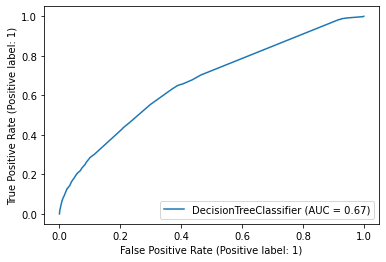

In [99]:
metrics.plot_roc_curve(d_tree_depth, X_test, y_test) 
plt.show()
# 67% is the AUC. Although higher accuracy is obtained but the number of features incrementally added in the data is way too many.
# The increase in accuracy does not justify the number of additional variables present.

## Model 7 : D- tree Model with Features having feature importance > 0
## Reasons for performing this method : 
Can help in reducing the overfitting chances further

In [100]:
a= pd.DataFrame({'feature':list(X_train.columns),'importance'  : list(d_tree_depth.feature_importances_)}).sort_values(by='importance',ascending=False)

In [101]:
list(a[a.importance > 0].feature)

['C18_2',
 'C16_250',
 'C18_1',
 'site_category_28905ebd',
 'hour',
 'C19_39',
 'banner_pos_1',
 'C21_15',
 'day',
 'device_type',
 'C17_1872',
 'app_category_f95efa07',
 'C17_2667',
 'C19_303',
 'C20_100004',
 'C18_3',
 'C14_20093',
 'site_category_3e814130',
 'C19_47',
 'app_category_0f2161f8',
 'C20_100148',
 'C17_2162',
 'C17_1993',
 'C20_100076',
 'device_conn_type',
 'C17_2374',
 'dayofweek',
 'C17_2518',
 'C20_100079',
 'C20_100034',
 'C14_17264',
 'C14_23726',
 'C1_1002',
 'C19_547',
 'C20_100077',
 'C17_2495',
 'site_category_f028772b',
 'C17_1882',
 'C19_1327',
 'C14_21691',
 'C20_100084',
 'C17_1887',
 'C20_100193',
 'C14_18856',
 'C21_71',
 'C20_100012',
 'C14_22141',
 'C17_2688',
 'C20_100068',
 'site_category_50e219e0',
 'C14_23454',
 'C19_1319',
 'C20_100005',
 'C20_100111',
 'C14_21814']

In [102]:
xt = X_train[list(a[a.importance > 0].feature)]

In [103]:
best_grid2 = grid.best_estimator_

In [104]:
best_grid2.fit(xt,y_train)

DecisionTreeClassifier(max_depth=5)

In [105]:
xt.shape # 54 Features are used

(69999, 55)

In [106]:
best_grid2.score(X_test[list(a[a.importance > 0].feature)], y_test)
## Good accuracy achieved with lesser features 

0.8320333333333333

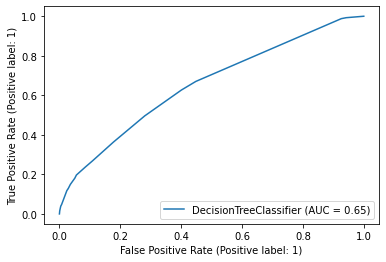

In [107]:
metrics.plot_roc_curve(best_grid2, X_test[list(a[a.importance > 0].feature)], y_test) 
plt.show()
# 65% is the AUC  - Using Occam's Razor we can say that this model is better among all Decision Tree models made
# because the number of features used are less and good accuracy is obtained

## Model 8 : Random Forest with 3 trees and max_depth = 10
### Reason for using this model:
1. checking if further increase in accuracy is happening
2. Ensembling helps in reducing the number of features in a tree and improve accuracy by using multiple tree. We can check if we are able to leverage this quality of Random forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier( n_estimators=3, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=3, random_state=42)

In [109]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

In [110]:
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [111]:
model_rf.score(X_test, y_test)

0.8293

In [112]:
cnf_matrix = metrics.confusion_matrix(y_test,predict_rf)
print(cnf_matrix)

[[24872     8]
 [ 5113     7]]


In [113]:
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24880
           1       0.47      0.00      0.00      5120

    accuracy                           0.83     30000
   macro avg       0.65      0.50      0.45     30000
weighted avg       0.77      0.83      0.75     30000



In [114]:
#Feature Importance
feature_importances = model_rf.feature_importances_
features = list(X_train.columns)
d = pd.DataFrame({'features': features, 'importance': list(feature_importances)})
print(d.sort_values(by='importance',ascending=False))

              features  importance
1     device_conn_type    0.140179
2192          C19_1063    0.096750
4                 hour    0.069180
2223            C19_39    0.057693
2190             C18_2    0.040365
...                ...         ...
858          C14_22085    0.000000
859          C14_22086    0.000000
860          C14_22089    0.000000
861          C14_22090    0.000000
2466            C21_95    0.000000

[2467 rows x 2 columns]


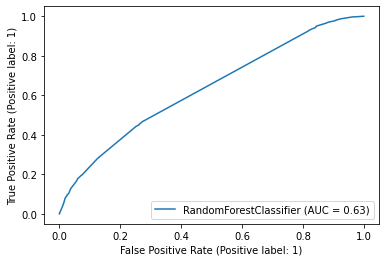

In [115]:
metrics.plot_roc_curve(model_rf, X_test, y_test) 
plt.show()
# 63% AUC Score

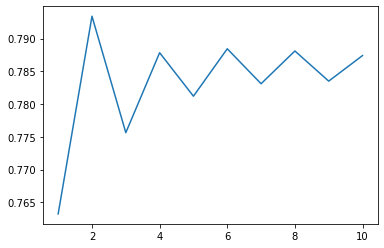

In [116]:
# Finding Best No. of tress in Random forest
l=[]
m=[]
for i in range(1,11):
    model_rf = RandomForestClassifier( n_estimators=i, random_state=42)
    model_rf.fit(X_train, y_train)
    y_preds=model_rf.predict(X_test)
    l.append(i) 
    m.append(metrics.accuracy_score(y_test,y_preds))
plt.plot(l,m)    

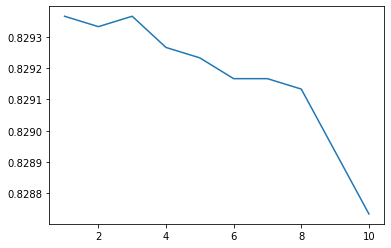

In [117]:
# Finding best depth for Random forest
l=[]
m=[]
for i in range(1,11):
    model_rf = RandomForestClassifier( n_estimators=2,max_depth=i, random_state=42)
    model_rf.fit(X_train, y_train)
    y_preds=model_rf.predict(X_test)
    l.append(i) 
    m.append(metrics.accuracy_score(y_test,y_preds))
plt.plot(l,m)    

## Model 9 : Random Forest with 2 Trees and max_depth = 3
### Reason for using this :
Based on the optimization of parameters above

In [118]:
model_rf = RandomForestClassifier( n_estimators=2, max_depth=3, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=2, random_state=42)

In [119]:
model_rf.score(X_test, y_test)
# No increase in accuracy is observed

0.8293666666666667

## Model 10 : Random Forest with feature selection
### Reason for using this : 
Checking if simplification of model is helping in improving of accuracy

In [120]:
model_rf = RandomForestClassifier( n_estimators=2, max_depth=3, random_state=42)
model_rf.fit(X_train.drop(col_to_remove,axis=1), y_train)

RandomForestClassifier(max_depth=3, n_estimators=2, random_state=42)

In [121]:
model_rf.score(X_test.drop(col_to_remove,axis=1), y_test)
# No Change in accuracy

0.8293333333333334

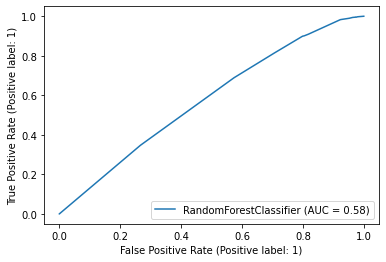

In [122]:
metrics.plot_roc_curve(model_rf, X_test.drop(col_to_remove,axis=1), y_test) 
plt.show()
# 58% is the AUC. Very less AUC is obtained considering the complexity of the model.

In [123]:
confusion_matrix(y_test,model_rf.predict(X_test.drop(col_to_remove,axis=1)))

array([[24880,     0],
       [ 5120,     0]], dtype=int64)

# Summary
- Three different algorithms were tried out : 1. Logistic Regression , 2. Decision Tree , 3. Random Forest
- The Accuracy and AUC value are used as a judging parameter of the models and it is found that all three models are performing similarly on the dataset.
- The feature selection helped us in reducing the number of feature while keeping the accuracy intact.
- Based on the 10 Model Analysed, it will be best to used Logistic Regression Model with Feature Selection operation done. This is because it ensures that a simple model is chosen and number of features are not too many. This is a good selection because use of Decision tree or Random Forest Did not bring about a significant increase in the Accuracy of decisioning.
- Best Model Among All - Model No. 3 : Logistic Regression after Dropping Site Category and App Category Variables